# Aircraft risk analysis

![airplane image](./images/miguel-angel-sanz-yXE0zybDr-I-unsplash.jpg)

# Table of contents
1. [Overview](#Overview)
2. [Business problem](#Business-problem)
3. [Data understanding](#Data-understanding)
4. [Data preparation](#Data-preparation)
5. [Analysis](#Analysis)
6. [Conclusion](#Conclusion)
7. [Further discussions](#Further-discussions)

# Overview

This project aims to analyze historical aviation data from the National Transportation Safety Board (NTSB) spanning from 1962 to 2022. The dataset gathers near 88 889 records on aviation event. The project caters to a primary audience, the business stakeholders who need intuitve summaries and clear recommendations. The ultimate goal is to translate the findings into clear and actionable insights that support safer operational strategies. 

# Business problem

![flying airplane](images/robert-aardenburg-gnT4IGRS_1g-unsplash.png)

A company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. My task is to analyze aviation accident data to identify the safest aircraft models based on key factors, and to translate these findings into clear, actionable recommendations that the division can use to take informed decisions.

# Data understanding

The dataset from the NTSB includes detailed records for events, dating back to 1962, with unique identifiers for every aviation occurence. It captures key information such as the date and location of the event, the aircraft manufacturer and model, the damage extent, the fatality and injury counts, the weather condition, and the probable cause of the accident.

In [216]:
#import needed libraries
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [217]:
#import datasets
#dataset on aviation accidents records
aviation = pd.read_csv("AviationData.csv", encoding = 'latin1')

#dataset on US states
us_state = pd.read_csv("USState_Codes.csv")

In [218]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [219]:
us_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


## Aviation accidents dataset

Let's start by doing an exploration of the dataset so we can understand what we are working with.

In [220]:
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [221]:
aviation['Event.Date'].describe()

count          88889
unique         14782
top       1982-05-16
freq              25
Name: Event.Date, dtype: object

In [222]:
aviation['Investigation.Type'].value_counts()

Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64

In [223]:
aviation['Country'].value_counts()

Country
United States               82248
Brazil                        374
Canada                        359
Mexico                        358
United Kingdom                344
                            ...  
Mauritania                      1
Pacific Ocean                   1
Obyan                           1
Guernsey                        1
Turks and Caicos Islands        1
Name: count, Length: 219, dtype: int64

In [224]:
aviation['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [225]:
aviation['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

## US States dataset

This dataset contains informations about the US States and their abbreviation as well as abbreviation for othher countries and geographical spaces.

In [226]:
us_state.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [227]:
us_state['US_State'].describe()

count          62
unique         62
top       Alabama
freq            1
Name: US_State, dtype: object

# Data preparation

## Data cleaning

The overall data cleaning process ensures the dataset is accurate, consistent, and ready for analysis. This will be done by handling missing data in NTSB aviation dataset, correcting data types, but also standardizing key fields.

### Structural data cleaning

In [228]:
#clean and standardize column names for consistency
aviation.columns = (
    aviation.columns
    .str.strip()
    .str.lower()
    .str.replace('.', '_')
    .str.replace(' ', '_')
)

us_state.columns = (
    us_state.columns
    .str.strip()
    .str.lower()
    .str.replace('.', '_')
    .str.replace(' ', '_')
)

In [ ]:
#identify columns with critical level of missing data
print((aviation.isnull().sum() / len(aviation)) * 100)

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [230]:
#drop unnecessary columns and those with at least 40% of missing data
dropped_col = [
    'latitude', 'longitude', 'airport_code', 'airport_name',
    'far_description', 'schedule', 'air_carrier',
    'publication_date', 'report_status'
]

aviation = aviation.drop(columns = dropped_col)

In [231]:
#drop rows with too many missing data for important columns 
aviation  =  aviation.dropna(subset = ['model', 'registration_number', 'aircraft_category'])

In [232]:
#remove duplicates
key_columns = ['accident_number', 'event_date', 'make', 'model', 'location']
duplicates_key = aviation[aviation.duplicated(subset = key_columns, keep = 'first')]

duplicates = ['accident_number', 'event_date', 'make', 'model', 'location']
aviation = aviation.drop_duplicates(subset = duplicates, keep = 'first')

In [233]:
aviation['make'] = aviation['make'].str.strip().str.replace(r'[.,/]', '', regex = True)

### Content-level data cleaning

#### Handling missing values

In [234]:
#fill all categorical columns at once
fill_cols = [
    'location', 'country', 'aircraft_damage',
    'make', 'model', 'engine_type', 'purpose_of_flight', 'broad_phase_of_flight'
]

aviation[fill_cols] = aviation[fill_cols].fillna('Unknown')

In [235]:
#fill injury related column with 0
injury_columns = ['total_fatal_injuries', 'total_serious_injuries',
                  'total_minor_injuries', 'total_uninjured']
aviation[injury_columns] = aviation[injury_columns].fillna(0).astype(int)

In [236]:
#standardization and filling
aviation['amateur_built'] = (
    aviation['amateur_built']
    .str.strip()
    .str.upper()
    .fillna('Not reported')
)

aviation['engine_type'] = (
    aviation['engine_type']
    .replace({'UNK': 'Unknown'})
    .fillna('Unknown')
)

aviation['weather_condition'] = (
    aviation['weather_condition']
    .replace({'Unk': 'Unknown', 'UNK': 'Unknown' })
    .fillna('Unknown')
)

In [237]:
aviation['number_of_engines'] = aviation['number_of_engines'].fillna(1)

In [238]:
aviation['injury_severity'] = aviation['injury_severity'].fillna('Unavailable')

#clean data from removing text inside parentheses
aviation['injury_severity'] = aviation['injury_severity'].str.split("(").str[0]

#### Standardize key categorical fields and filter out irrelevant records

In [239]:
aviation['make'] = (
    aviation['make']
    .str.strip()
    .str.upper()
)

aviation['model'] = (
    aviation['model']
    .str.strip()
    .str.upper()
    .str.replace(r'[-_\s]+', '', regex = True)
)

Excluding test, ferry, and unknown purpose of flight helps focus on standard aircraft usage. This will ensure more accurate results when evaluating aircraft safety performance.

In [240]:
test_flight = aviation['purpose_of_flight'].str.contains('Test|Ferry|Unknown', na = False)
aviation = aviation[~test_flight]

## Calculations

In [241]:
aviation['event_date'] = pd.to_datetime(aviation['event_date'])

aviation['event_year'] = aviation['event_date'].dt.year
aviation['event_month'] = aviation['event_date'].dt.month_name()

In [242]:
col_conversion = [
    'number_of_engines', 'total_fatal_injuries',
    'total_serious_injuries', 'total_minor_injuries',
    'total_uninjured'
]

aviation[col_conversion] = aviation[col_conversion].astype(int)

In [243]:
num_cols = [
    'total_fatal_injuries', 'total_serious_injuries', 
    'total_minor_injuries', 'total_uninjured'
]

aviation['total_involved'] = aviation[num_cols].sum(axis = 1).astype(int)

In [244]:
damage_severity = {
    'Destroyed' : 3,
    'Substantial' : 2,
    'Minor' : 1
}

aviation['damage_level'] = aviation['aircraft_damage'].map(damage_severity).fillna(0).astype(int)

## Merging datasets

In [245]:
#split abbreviations from cities in locations
aviation['state'] = aviation['location'].str.split(',').str[1].str.strip()

In [246]:
cleaned_aviation = aviation.merge(
    us_state,
    left_on = 'state',
    right_on = 'abbreviation',
    how = 'left'
).drop('abbreviation', axis = 1)

In [247]:
cleaned_aviation.to_csv('CleanedAviationData1.csv', index = False)

In [248]:
cleaned_aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26134 entries, 0 to 26133
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                26134 non-null  object        
 1   investigation_type      26134 non-null  object        
 2   accident_number         26134 non-null  object        
 3   event_date              26134 non-null  datetime64[ns]
 4   location                26134 non-null  object        
 5   country                 26134 non-null  object        
 6   injury_severity         26134 non-null  object        
 7   aircraft_damage         26134 non-null  object        
 8   aircraft_category       26134 non-null  object        
 9   registration_number     26134 non-null  object        
 10  make                    26134 non-null  object        
 11  model                   26134 non-null  object        
 12  amateur_built           26134 non-null  object

In [249]:
cleaned_aviation.head()

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,registration_number,...,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,event_year,event_month,total_involved,damage_level,state,us_state
0,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,N2482N,...,0,2,VMC,Takeoff,1982,January,2,2,WA,Washington
1,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,N7967Q,...,0,2,IMC,Landing,1982,January,2,2,NJ,New Jersey
2,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,N14779,...,1,0,IMC,Cruise,1982,January,1,3,LA,Louisiana
3,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Airplane,N758SK,...,0,0,IMC,Takeoff,1982,January,1,3,TX,Texas
4,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,Fatal,Destroyed,Airplane,N4876K,...,0,0,IMC,Cruise,1982,January,1,3,OK,Oklahoma


# Analysis

In [250]:
#import needed librairies
import matplotlib
import matplotlib.pyplot as plt

#output the graph within the document
%matplotlib inline

According to the given business problem, the company is specifically interested in purchasing airplanes , not other aircraft types (e.g., helicopters, gliders). Including non-airplane data would mislead our analysis, as these aircraft have different operational risks, regulations, and use cases. By filtering for airplanes only, we ensure our recommendations are directly relevant to the company’s decision-making process.

In [251]:
#filter the only the airplane category from the dataset
aviation_relevance = cleaned_aviation[cleaned_aviation['aircraft_category'] == 'Airplane']
aviation_relevance

,event_id,investigation_type,accident_number,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,registration_number,...,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,event_year,event_month,total_involved,damage_level,state,us_state
0,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,N2482N,...,0,2,VMC,Takeoff,1982,January,2,2,WA,Washington
1,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,N7967Q,...,0,2,IMC,Landing,1982,January,2,2,NJ,New Jersey
2,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,N14779,...,1,0,IMC,Cruise,1982,January,1,3,LA,Louisiana
3,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Airplane,N758SK,...,0,0,IMC,Takeoff,1982,January,1,3,TX,Texas
4,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,Fatal,Destroyed,Airplane,N4876K,...,0,0,IMC,Cruise,1982,January,1,3,OK,Oklahoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26128,20221215106460,Accident,ERA23LA088,2022-12-10,"Alabaster, AL",United States,Non-Fatal,Substantial,Airplane,N5301G,...,0,2,Unknown,Unknown,2022,December,2,2,AL,Alabama
26129,20221212106444,Accident,ERA23LA085,2022-12-12,"Knoxville, TN",United States,Non-Fatal,Substantial,Airplane,N783SF,...,0,1,VMC,Unknown,2022,December,1,2,TN,Tennessee
26131,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,N416PC,...,0,1,VMC,Unknown,2022,December,1,2,PR,Puerto Rico
26132,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,N5405V,...,0,0,VMC,Unknown,2022,December,1,2,FL,Florida


To ensure that our findings reflect risks and avoid biases from non-catastrophic events, we will filter our data to focus on accidents.

In [252]:
#filter the accidents only from the dataset
accidents = aviation_relevance[aviation_relevance['investigation_type'] == 'Accident']

## 1. Fatality rate over time
We look at how the proportion of fatal injuries in aviation accidents has changed over decades. Our goal is to detect major trends that indicate improvements or setbacks in aviation safety.

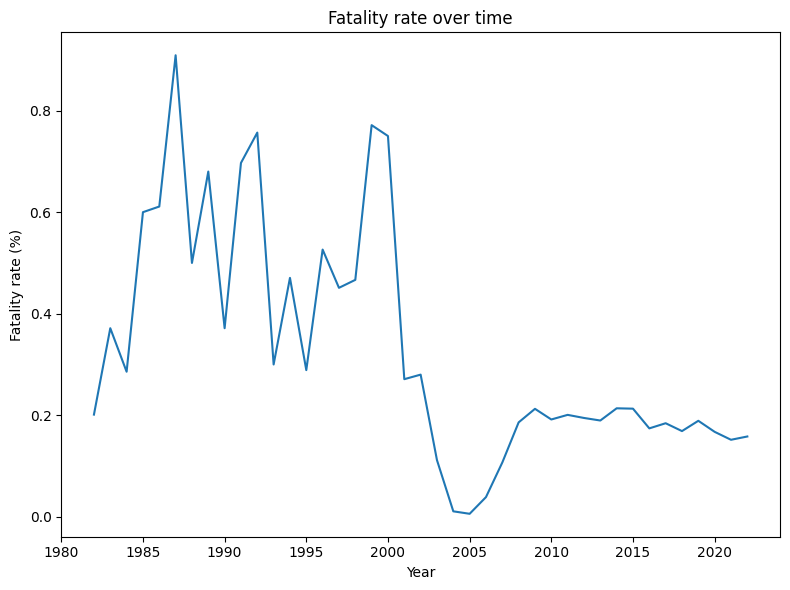

In [253]:
#group by year
yearly = accidents.groupby('event_year').agg(
    total_fatal = ('total_fatal_injuries', 'sum'),
    total_involved = ('total_involved', 'sum')
)
yearly['fatality_rate'] = yearly['total_fatal'] / yearly['total_involved']

#plot
plt.figure(figsize = (8, 6))
plt.plot(yearly.index, yearly['fatality_rate'], linestyle = '-')
plt.title('Fatality rate over time')
plt.xlabel('Year')
plt.ylabel('Fatality rate (%)')

plt.tight_layout()
plt.show()

There is a clear trend of decreasing fatality rates, especially after 2005, indicating significant advancements in aviation safety. The early years show high variability, with occasional spikes in fatality rates, suggesting periods of increased risk or specific incidents. The more recent years exhibit a stable and consistently low fatality rate, reflecting potential sustained improvements.

## 2. Injury severity by weather condition
We investigate how accident outcomes differ under instrument meteorological conditions (IMC) versus visual meteorological conditions (VMC).

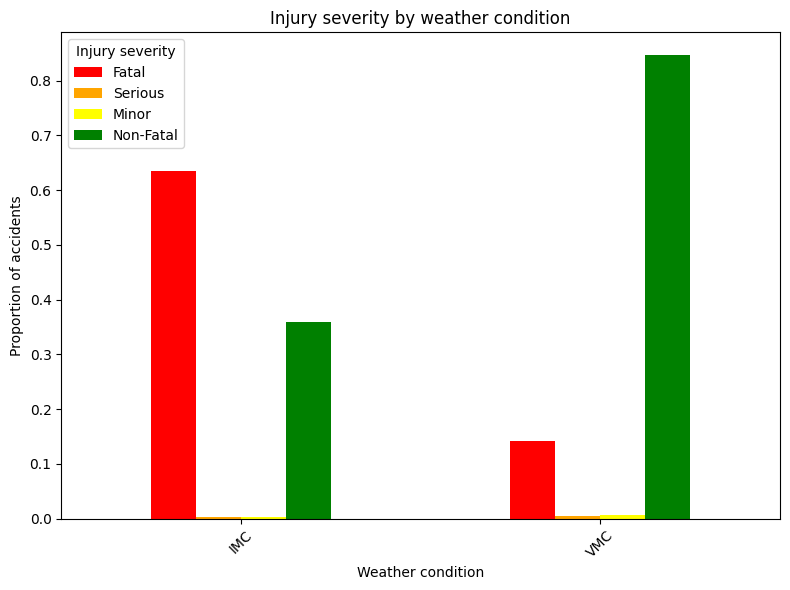

In [254]:
weather_stats = accidents.groupby(['weather_condition', 'injury_severity']).size().unstack(fill_value = 0)
weather_stats = weather_stats.div(weather_stats.sum(axis = 1), axis = 0)

weather_stats = weather_stats[weather_stats.index != 'Unknown']

#plot
weather_stats[['Fatal', 'Serious', 'Minor', 'Non-Fatal']].plot(kind = 'bar', figsize = (8, 6), color = ['red','orange','yellow','green'])
plt.title('Injury severity by weather condition')
plt.xlabel('Weather condition')
plt.ylabel('Proportion of accidents')
plt.xticks(rotation = 45)
plt.legend(title='Injury severity')

plt.tight_layout()
plt.show()

IMC (Instrument Meteorological Conditions) is associated with significantly higher risks, particularly for fatal outcomes, due to challenges like poor visibility and adverse weather. In contrast, VMC (Visual Meteorological Conditions) presents a much safer environment, with most incidents resulting in no serious harm. The data highlights that flying in clear weather reduces severe accident risks, though some danger remains due to factors like pilot error or mechanical failure.

## 3. Injury severity by flight purpose
We have to compare injury outcomes across different types of flight missions. It will reveal which flight purposes are associated with higher proportions of fatal or serious injuries, helping identify risk levels tied to operational intent.

We grouped the purpose of flight into broader categories to simplify analysis. By doing so, we reduce noise in the data and focus on operational similarities that influence accident severity and frequency.

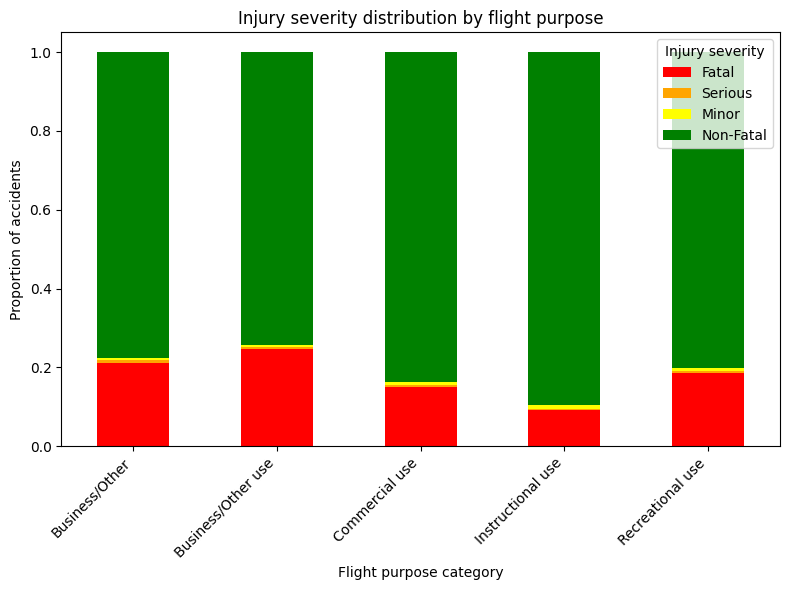

In [255]:
#define mapping for grouped purposes
purpose_mapping = {
    'Aerial Application': 'Commercial use',
    'Firefighting': 'Commercial use',
    'Public Aircraft - Federal': 'Commercial use',
    'Public Aircraft - State': 'Commercial use',
    'Public Aircraft - Local': 'Commercial use',
    'Public Aircraft': 'Commercial use',
    'Air Drop': 'Commercial use',
    'ASHO': 'Commercial use',
    'PUBS': 'Commercial use',

    'Instructional': 'Instructional use',
    'Glider Tow': 'Instructional use',

    'Personal': 'Recreational use',
    'Skydiving': 'Recreational use',
    'Air Race/show': 'Recreational use',
    'Banner Tow': 'Recreational use',
    'External Load': 'Recreational use',

    'Business': 'Business/Other use',
    'Executive/corporate': 'Business/Other use',
    'Other Work use': 'Business/Other use',
    'Positioning': 'Business/Other',
    'Aerial Observation': 'Business/Other use'
}

#apply grouping
accidents['grouped_purpose'] = accidents['purpose_of_flight'].map(purpose_mapping)

#filter out rows with unmapped values
df_grouped = accidents[accidents['grouped_purpose'].notna()]

#group by grouped purpose and injury severity
grouped_data = df_grouped.groupby(['grouped_purpose', 'injury_severity']).size().unstack(fill_value = 0)
grouped_data = grouped_data[['Fatal', 'Serious', 'Minor', 'Non-Fatal']] 
grouped_data = grouped_data.div(grouped_data.sum(axis = 1), axis = 0)

#plot stacked bar chart
grouped_data.plot(kind = 'bar', stacked = True, color = ['red', 'orange', 'yellow', 'green'], figsize = (8, 6))

plt.title('Injury severity distribution by flight purpose')
plt.xlabel('Flight purpose category')
plt.ylabel('Proportion of accidents')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Injury severity')

plt.tight_layout()
plt.show()

There are significant differences in injury severity across various flight purpose categories. Recreational use has the highest proportion of fatal and serious injuries, while Commercial use and Instructional use are dominated by non-fatal incidents, indicating lower risks. Business/Other use falls in the middle, with moderate risks but still dominated by non-fatal outcomes.

## 4. Engine type vs fatality rate
We explore how different engine types are associated with varying fatality rates. Our goal is to determine which propulsion systems are historically tied to higher or lower risks

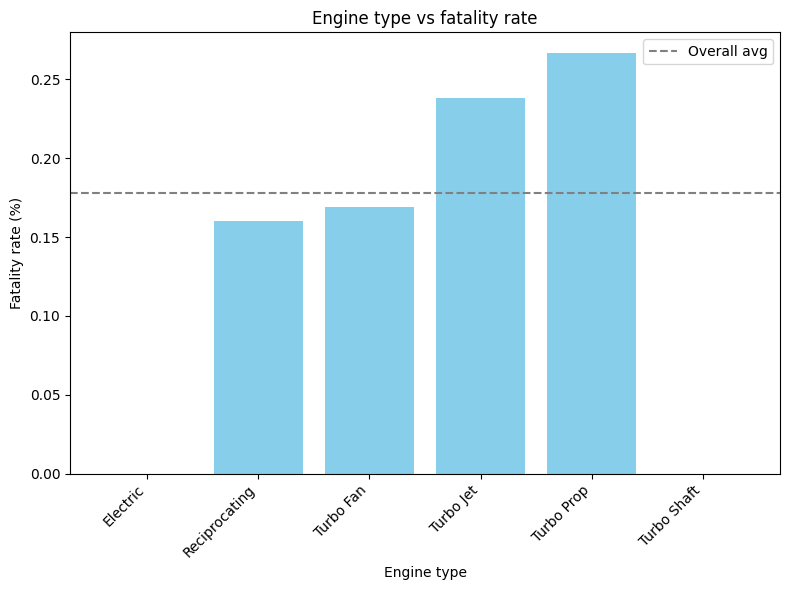

In [256]:
#group by engine type
engine_stats = accidents.groupby('engine_type').agg(
    total_fatal=('total_fatal_injuries', 'sum'),
    total_involved=('total_involved', 'sum')
)
engine_stats['fatality_rate'] = engine_stats['total_fatal'] / engine_stats['total_involved']

#filter out unknown values
engine_stats = engine_stats[engine_stats.index != 'Unknown']

#plot
plt.figure(figsize = (8, 6))
plt.bar(engine_stats.index, engine_stats['fatality_rate'], color = 'skyblue')
plt.axhline(y = accidents['total_fatal_injuries'].sum() / accidents['total_involved'].sum(), color = 'gray', linestyle = '--', label = 'Overall avg')
plt.title('Engine type vs fatality rate')
plt.xlabel('Engine type')
plt.ylabel('Fatality rate (%)')
plt.xticks(rotation = 45, ha = 'right')
plt.legend()

plt.tight_layout()
plt.show()

Electric engines have the lowest fatality rate, making them the safest option, while Turbo Prop and Turbo Jet engines show significantly higher risks. Reciprocating and Turbo Fan engines fall in the middle with moderate fatality rates. This variation suggests that engine type plays a key role in determining risk levels. Operations using Turbo Prop or Turbo Jet engines may require stricter safety protocols and advanced pilot training. Electric and Reciprocating engines, while comparatively safer, still require standard safety measures.

## 5. Total vs fatal accidents: amateur-built vs factory-built aircraft
We compare the number of total and fatal accidents between amateur-built and factory-built aircraft.

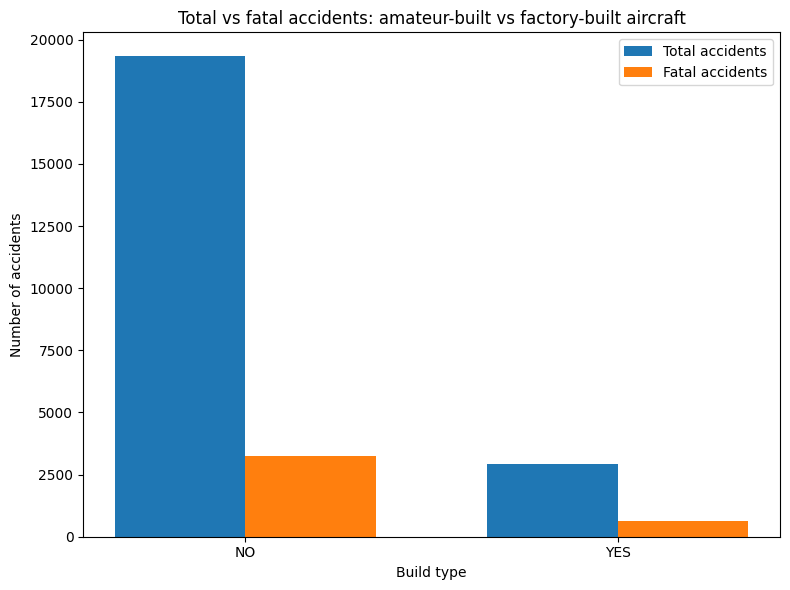

In [257]:
#filter out 'Not reported'
filtered_accidents = accidents[accidents['amateur_built'] != 'Not reported']

#group by amateur_built
grouped = filtered_accidents.groupby('amateur_built').agg(
    total_accidents = ('event_id', 'count'),
    fatal_accidents = ('injury_severity', lambda x: (x == 'Fatal').sum())
).reset_index()

#plot
fig, ax = plt.subplots(figsize = (8,6))
bar_width = 0.35
index = grouped.index

#positions for the bars
bar1 = ax.bar(index, grouped['total_accidents'], bar_width, label = 'Total accidents')
bar2 = ax.bar(index + bar_width, grouped['fatal_accidents'], bar_width, label = 'Fatal accidents')

ax.set_xlabel('Build type')
ax.set_ylabel('Number of accidents')
ax.set_title('Total vs fatal accidents: amateur-built vs factory-built aircraft')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped['amateur_built'])
ax.legend()

plt.tight_layout()
plt.show()

Amateur-built aircraft have a higher fatality rate despite fewer total accidents, indicating that when accidents occur, they are more likely to be fatal. Factory-built aircraft, while involved in more incidents overall, have a lower proportion of fatal outcomes, suggesting a safer profile. This disparity highlights that build type significantly influences both the frequency and severity of accidents.

## 6. Top aircraft manufacturers involved in destroyed aircraft accidents
Highlights which aircraft manufacturers have historically been most frequently involved in accidents resulting in total destruction. The focus is on identifying high-risk manufacturers.

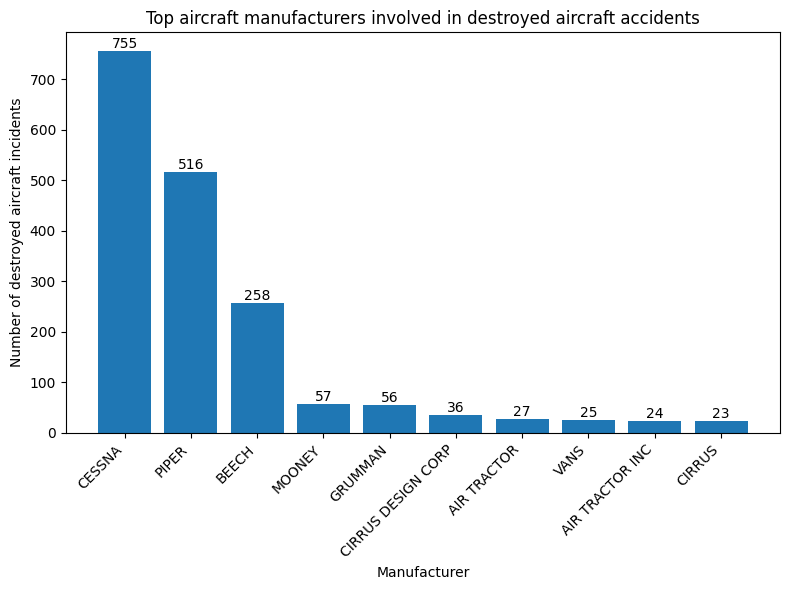

In [258]:
#filter aircraft damage
destroyed_accidents = accidents[accidents['aircraft_damage'] == 'Destroyed']
make_destroyed = destroyed_accidents.groupby('make').size().reset_index(name = 'destroyed_count')
top_makes_destroyed = make_destroyed.sort_values(by = 'destroyed_count', ascending = False).head(10)

#create plot
plt.figure(figsize = (8, 6))
bars = plt.bar(top_makes_destroyed['make'], top_makes_destroyed['destroyed_count'])

#add labels on bars
plt.bar_label(bars, labels = top_makes_destroyed['destroyed_count'])

plt.title('Top aircraft manufacturers involved in destroyed aircraft accidents')
plt.xlabel('Manufacturer')
plt.ylabel('Number of destroyed aircraft incidents')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The chart highlights a significant disparity in the number of destroyed aircraft incidents across different manufacturers. CESSNA and PIPER stand out with the highest numbers, suggesting they may carry a higher risk profile. However, further analysis is needed to contextualize these findings.

# Conclusion

Based on the analysis conducted, here are three key recommendations to help the company make informed decisions when purchasing and operating aircraft:

1. Prioritize factory-built aircraft from low-risk manufacturers
    - Amateur-built aircraft and certain manufacturers (e.g., GRUMMAN) show higher rates of destroyed incidents and fatal outcomes. Focus on purchasing factory-built aircraft from manufacturers with historically lower damage and fatality rates, such as CESSNA, AIR TRACTOR INC, or MAULE. These aircraft tend to have better design oversight, standardized maintenance protocols, and a larger support infrastructure, reducing operational risk.
2. Select aircraft with turbo fan or electric engines; avoid turbo prop for high-risk missions
    - Turbo Prop engines have the highest fatality rate among all engine types. Consider Turbo Fan or Electric engines for safer performance profiles, especially for commercial use. Electric engines offer the lowest fatality rates and may represent a future-forward investment, particularly for short-range or training missions.
3. Avoid high-risk aircraft models with poor safety histories
    - Based on incident data, some aircraft models and manufacturers show disproportionately high rates of destroyed aircraft incidents and fatal outcomes. Specifically, aircraft from GRUMMAN, and certain models under BEECH, PIPER, or MOONEY have shown higher-than-average risks in terms of both damage severity and injury outcomes. Investigate model-specific safety records before purchase, not all models within a manufacturer carry the same risk profile.

# Further discussions

If further analysis had been conducted, there would have been additional discussions that could provide deeper insights into aircraft risk and safety trends.

1. Deep dive into high-risk aircraft models
    - Focusing on high-risk aircraft models can reveal which specific models have higher destruction or fatality rates, helping identify risks linked to design flaws or operational misuse. This analysis helps the company to make informed purchasing decisions by model, avoiding those with poor safety histories even within generally reliable manufacturer brands.
2. Cause analysis of accidents by build type
    - Investigating the root causes of accidents across factory-built vs amateur-built aircraft can reveal why amateur-built aircraft show higher fatality and destruction rates. This analysis would help determine whether risks stem from design flaws, lack of oversight, insufficient pilot experience, or specific mechanical failures more common in amateur-built models. 
3. Mapping of Flight Purpose to Risk Profile and Aircraft Type
    - Cross-referencing flight purpose with aircraft make/model, engine type, accident severity can reveal which aircraft types are historically safer or riskier for specific missions. This analysis helps identify whether certain models or engine types are more prone to accidents depending on how the aircraft is used.